<a href="https://colab.research.google.com/github/sethumj/web-scraping/blob/main/ITC510_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Android vs. iOS : Popular Games

The mobile gaming industry has seen tremendous growth over the years, and game development companies and individual game developers are always on the lookout for new insights into the market to guide their decision-making process. This project aims to provide a better understanding of the market situation by comparing and contrasting the popular games in the App Store and Play Store.

Team Members :                                                                     
1.Sethu Mettukulam Jagadeesan                                                    
2.Jayasri Duggina                                                                
3.Jashwanth Jampala


### Scrapping App Store


In [ ]:
import requests
from bs4 import BeautifulSoup
#getting the index of the size and returning the size
def getSize(var):
  i = 0
  for x in var :
    if x == 'Size' :
      i=i+1
      break
    i=i+1
  return var[i]+" "+var[i+1]

#getting the index of the price anf returning the price
def getPrice(var):
  i = 0
  for x in var :
    if x == 'Price' :
      i=i+1
      break
    i=i+1
  return var[i]

#to scrape the app store for data using the url sent
def scrape_app_details(url,genre):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    app_details = {}

    # Scrape app name and ID
    app_name = soup.find("h1").get_text()
    app_id = soup.find("h2", {"class": "product-header__identity app-header__identity"}).find('a')['data-metrics-click'].split('targetId":"')[1].split('"')[0]
    app_details["name"] = app_name.split("\n")[1].strip()
    app_details["id"] = app_id
    app_details["age"] = str(app_name)[-4:-2].strip()
    app_details["category"] = genre

    # Scrape reviews
    try:
      reviews = soup.find("figcaption", {"class": "we-rating-count star-rating__count"}).get_text()
      app_details["rating"] = str(reviews).split(" ")[0]
      app_details["no_of_ratings"] = str(reviews).split(" ")[2]
    except:
      app_details["rating"] = None
      app_details["no_of_ratings"] = None

    #scrape size and price

    price = soup.find("section",{"class":"l-content-width section section--bordered section--information"}).get_text()
    app_details["Size"] = getSize(price.split())
    app_details["Price"] = getPrice(price.split())

    #returning the dictionary
    return app_details

#Scrapping the app store of all the genre under ios games
def scrape_top_apps(category):
    base_url = "https://apps.apple.com/us/genre/"
    app_details_list = []
    genres = {"Action": "-action/id7001" , "Adventure":"-adventure/id7002","Board":"-board/id7004","Card":"-card/id7005","Casino":"-casino/id7006","Casual":"-casual/id7003","Dice":"-dice/id7007","Educational":"-educational/id7008","Family":"-family/id7009","Music":"-music/id7011","Role Playing":"-playing/id7014","Simulation":"-simulation/id7015","Strategy":"-strategy/id7017","Trivia":"-trivia/id7018","Word":"-word/id7019","Racing":"-racing/id7013","Sports":"-sports/id7016","Puzzle":"-puzzle/id7012"}
    for genre,id in genres.items():
      url = base_url + category + id
      response = requests.get(url)
      soup = BeautifulSoup(response.text, "html.parser")
      selectedcontent_div = soup.find('div', {'id': 'selectedcontent'})
      app_list = selectedcontent_div.find_all("li")

      for app in app_list:
          app_details = {}
          app_url = app.find("a").get("href")
          app_details = scrape_app_details(app_url,genre)
          app_details_list.append(app_details)

    return app_details_list

# Scrape top apps in Games category
games = scrape_top_apps("ios-games")

# Print the scraped data for the first app
print(games[1])
print(len(games))

{'name': 'Crazy Kick! Fun Football game', 'id': '714804730', 'age': '12', 'category': 'Action', 'rating': '4.7', 'no_of_ratings': '483.3K', 'Size': '576.8 MB', 'Price': 'Free'}
3152


### Extracting CSV

In [ ]:
import pandas as pd
df = pd.DataFrame(games)
df.to_csv("ios_games.csv")

### Features extracted from App Store


*   Name
*   Application ID
*   Age
*   Category
*   Rating
*   Number of Rating
*   Size
*   Price



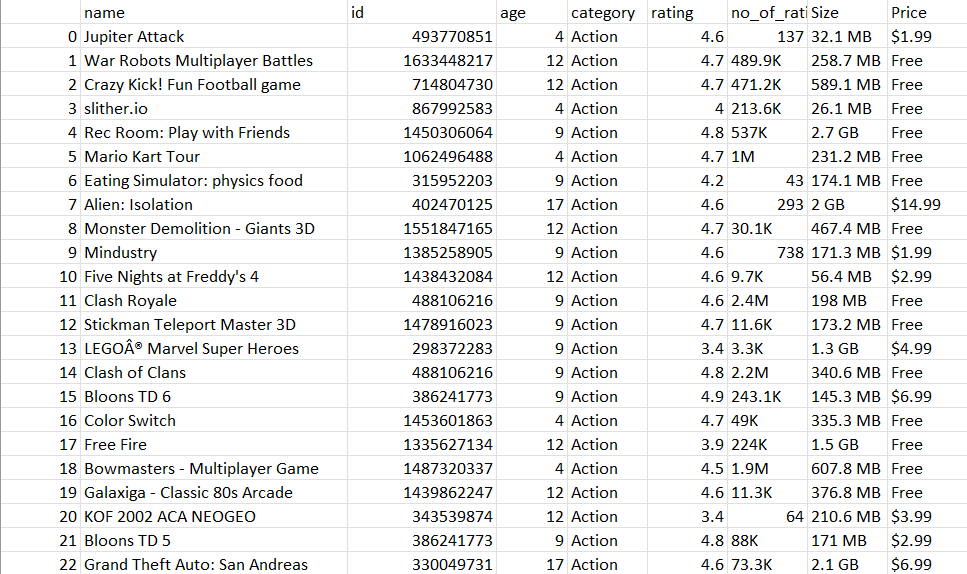

### Scrapping PlayStore for app id using the name of the application scrapped from App Store.

In [ ]:
df1  = pd.read_csv("ios_games.csv")
names = df1['name']
genre = df1['category']

Function for search URL generation

In [ ]:
#Function for url generation
def url_Gen(name):
  url1 = "https://play.google.com/store/search?q="
  url2 = "&c=apps&hl=en_US&gl=US"
  name = name.split(" ")
  mid = str(name[0])
  for x in range(1,len(name)):
    mid+="%20"+name[x]
  return url1+mid+url2


Scrapping the playstore url using the name of the application collected from the app store

In [ ]:
from pandas._libs.lib import generate_slices
def scrape_app_details(name):
    response = requests.get(url_Gen(name))
    soup = BeautifulSoup(response.text, "html.parser")
    try:
      url = soup.find('div',{'class':'XUIuZ'}).find('a',{'class':"Qfxief"})
      app_name = soup.find('div',{'class':'DxDVjd'}).find('div',{'class':"vWM94c"}).get_text()
      review = soup.find('div',{'class':'g1rdde'}).get_text().split(" ")[0]
      rating = soup.find('div',{'class':'ClM7O'}).get_text().split("s")[0]
      return url.get('href'), app_name , review, rating
    except:
      try:
        print(url_Gen(name))

        url = soup.find('div',{'class':'ftgkle'}).find('a',{'class':"Si6A0c Gy4nib"})
        app_name = soup.find('div',{'class':'ftgkle'}).find('div',{'class':"j2FCNc"}).find('span',{'class':"DdYX5"}).get_text()
        rating = soup.find('div',{'class':'ftgkle'}).find('span',{'class':'w2kbF'}).get_text().split("s")[0]
        return url.get('href'), app_name , None, rating
      except:
        try:
          url = soup.find('div',{'class':'T4LgNb '}).find('div',{'class':'XUIuZ'}).find('a',{'class':"Qfxief"})
          app_name = soup.find('div',{'class':"XUIuZ"}).find('div',{'class':"vWM94c"}).get_text()
          review = soup.find('div',{'class':"XUIuZ"}).find('div',{'class':'ClM7O'}).get_text().split(" ")[0]
          rating = soup.find('div',{'class':'XUIuZ'}).find('div',{'class':'TT9eCd'}).get_text().split("s")[0]
          return url.get('href'), app_name , review, rating
        except:
          return None,None,None,None
link = []
app_name = []
review = []
rating = []
category = []
count = 0
index = 0
for x in names:
  l, n ,r ,ra = scrape_app_details(x)
  link.append(l)
  app_name.append(n)
  review.append(r)
  rating.append(ra)
  category.append(genre[index])

  if l == None:
    count+=1
  print("Link : ",l," \nname:  ",n," \nreview :  ",r," \nrating : ",ra,"\n genre : ",genre[index])
  index+=1


Streaming output truncated to the last 5000 lines.
Link :  /store/apps/details?id=alex.coffeeroasterfree  
name:   Coffee Roaster  
review :   None  
rating :  4.8 
 genre :  Trivia
https://play.google.com/store/search?q=Mineral%20Quiz&c=apps&hl=en_US&gl=US
Link :  /store/apps/details?id=com.geoedukacja.rocksandminerals  
name:   Quiz - Rocks and minerals  
review :   None  
rating :  4.2 
 genre :  Trivia
https://play.google.com/store/search?q=Amazing%20Match%20for%20kids&c=apps&hl=en_US&gl=US
Link :  /store/apps/details?id=org.pbskids.gamesapp  
name:   PBS KIDS Games  
review :   None  
rating :  4.3 
 genre :  Trivia
Link :  /store/apps/details?id=games.elia.peoplesay  
name:   People Say - Family Game  
review :   20.3K  
rating :  4.7 
 genre :  Trivia
https://play.google.com/store/search?q=What%20Would%20You%20Choose?%20Rather&c=apps&hl=en_US&gl=US
Link :  /store/apps/details?id=net.wouldyouratherapp.wouldyourather  
name:   What Would You Rather Choose?  
review :   None  
rati

### Converting the scrapped app id to CSV

In [ ]:
 #this count is the number of application that has null values
 print(count)
 df = pd.DataFrame(list(zip(link, app_name,review,rating,category)),columns =['link','Name', 'review','rating','category'])
 df.to_csv("links_for_playstore.csv")

69


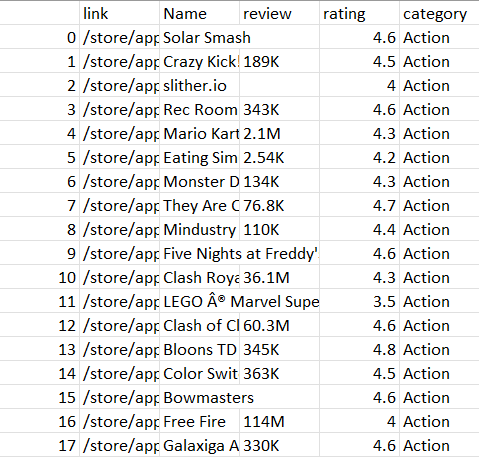

### Scrapping playstore using the Link generated from the above code


In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests, lxml, re, json
df = pd.read_csv("links_for_playstore.csv")
link = df['link']
genre = df['category']

def Generate_URL(link):
  url1 = "https://play.google.com"
  url2 = "&hl=en_US&gl=US"
  return url1+link+url2
def Get_basic(link):
  import re
  response = requests.get(link)
  soup = BeautifulSoup(response.text, "html.parser")
  pattern = re.compile(r"<script nonce=\"\w+\" type=\"application/ld\+json\">({.*?)</script>", re.DOTALL)
  basic_app_info = json.loads(pattern.findall(str(soup.select("script")[11]))[0])
  return basic_app_info

def scrape_app_details(link):
  try:
    if type(link)!= float:
      basic_app_info = Get_basic(Generate_URL(link))
      name = basic_app_info.get("name")
      types = basic_app_info.get("@type")
      url = basic_app_info.get("url")
      description = basic_app_info.get("description").replace("\n", "")
      category = basic_app_info.get("applicationCategory")
      os = basic_app_info.get("operatingSystem")
      content_rating = basic_app_info.get("contentRating")
      rating = round(float(basic_app_info.get("aggregateRating").get("ratingValue")), 1)
      reviews = basic_app_info.get("aggregateRating").get("ratingCount")
      price = basic_app_info["offers"][0]["price"]
      return name,types,url,description,category,os,content_rating,rating,reviews,price
    else :
        return None,None,None,None,None,None,None,None,None,None
  except :
    try:
      import re
      if type(link)!= float:
        response = requests.get(Generate_URL(link))
        soup = BeautifulSoup(response.text, "html.parser")
        basic_app_info = json.loads(re.findall(r"<script nonce=\"\w+\" type=\"application/ld\+json\">({.*?)</script>", str(soup.select("script")), re.DOTALL)[0])
        name = basic_app_info.get("name")
        types = basic_app_info.get("@type")
        url = basic_app_info.get("url")
        description = basic_app_info.get("description").replace("\n", "")
        category = basic_app_info.get("applicationCategory")
        os = basic_app_info.get("operatingSystem")
        content_rating = basic_app_info.get("contentRating")
        rating = round(float(basic_app_info.get("aggregateRating").get("ratingValue")), 1)
        reviews = basic_app_info.get("aggregateRating").get("ratingCount")
        price = basic_app_info["offers"][0]["price"]
        return name,types,url,description,category,os,content_rating,rating,reviews,price
      else :
        return None,None,None,None,None,None,None,None,None,None
    except:
        return None,None,None,None,None,None,None,None,None,None

name = []
types = []
url =[]
description = []
category = []
os = []
content_rating = []
rating = []
review = []
price = []
count=0
success = 0
index = 0
for x in link:
  n,t,u,des,c,o,con,r,re,p = scrape_app_details(x)
  if n == None:
    count+=1
    print("Missed : ",count)
  else:
    success+=1
    print("Got it ",success)
  name.append(n)
  types.append(t)
  url.append(u)
  description.append(des)
  category.append(genre[index])
  os.append(o)
  content_rating.append(con)
  rating.append(r)
  review.append(re)
  price.append(p)
  print(genre[index])
  index+=1


Streaming output truncated to the last 5000 lines.
Got it  580
Card
Missed :  74
Card
Got it  581
Card
Got it  582
Card
Got it  583
Card
Missed :  75
Card
Got it  584
Card
Got it  585
Card
Got it  586
Card
Missed :  76
Card
Got it  587
Card
Got it  588
Card
Missed :  77
Card
Got it  589
Card
Got it  590
Card
Got it  591
Card
Got it  592
Card
Got it  593
Card
Missed :  78
Card
Got it  594
Card
Missed :  79
Card
Missed :  80
Card
Missed :  81
Card
Got it  595
Card
Missed :  82
Card
Got it  596
Card
Missed :  83
Card
Got it  597
Card
Got it  598
Card
Got it  599
Card
Got it  600
Card
Got it  601
Card
Got it  602
Card
Missed :  84
Card
Got it  603
Card
Got it  604
Card
Got it  605
Card
Got it  606
Card
Got it  607
Card
Got it  608
Card
Got it  609
Card
Got it  610
Card
Got it  611
Card
Got it  612
Card
Got it  613
Card
Missed :  85
Card
Missed :  86
Card
Got it  614
Card
Got it  615
Card
Got it  616
Card
Got it  617
Card
Got it  618
Card
Got it  619
Card
Got it  620
Card
Got it  621
Card
G

### Converting the dataframe to CSV

In [ ]:
import pandas as pd
df = pd.DataFrame(list(zip(name,types,url,description,category,os,content_rating,rating,review,price)),columns =['name','types','url','description','category','os','content_rating','rating','review','price'])
df.to_csv("playstore_dataset_version_2.0.csv")

### Features extracted from play Store are


*   Name
*   Application Type
*   URL
*   Description
*   Category
*   Operating System
*   Content_rating(Age)
*   Rating
*   Review(Number of review)

*   Price

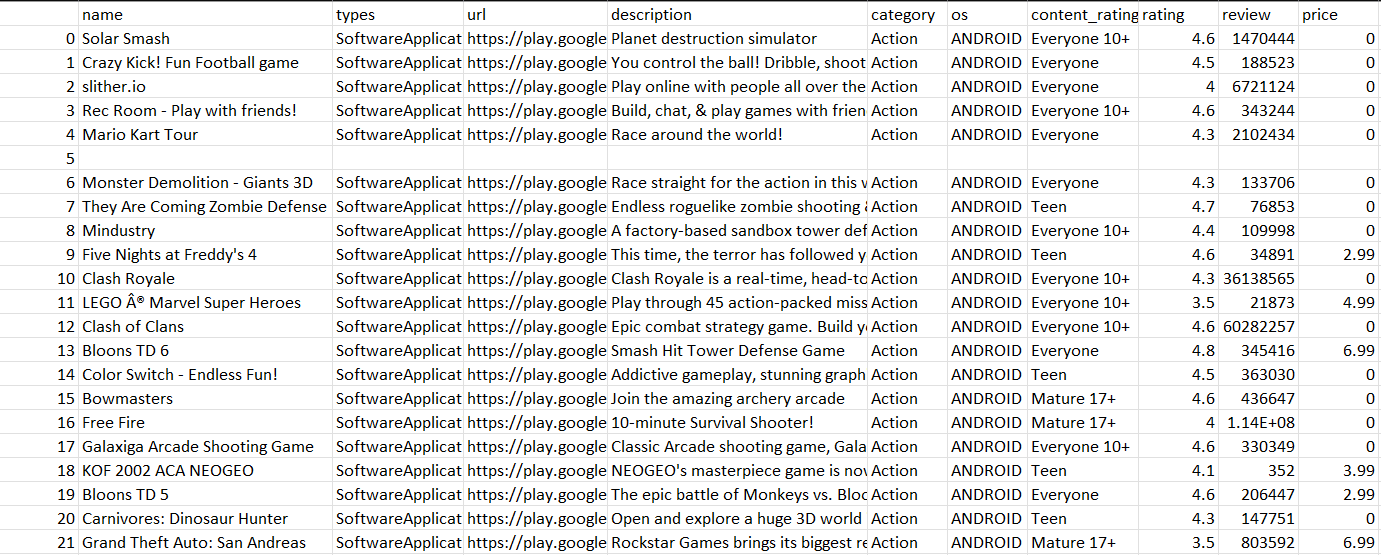

### Cleaning the datasets

In [ ]:
import pandas as pd
ios = pd.read_csv("ios_games.csv")
ios

,Unnamed: 0,name,id,age,category,rating,no_of_ratings,Size,Price
0,0,Jupiter Attack,493770851,4,Action,4.6,145,32.1 MB,$1.99
1,1,Crazy Kick! Fun Football game,714804730,12,Action,4.7,483.3K,576.8 MB,Free
2,2,slither.io,867992583,4,Action,4.0,214.9K,26.1 MB,Free
3,3,Rec Room: Play with Friends,1450306064,9,Action,4.8,545.1K,2.7 GB,Free
4,4,Mario Kart Tour,1062496488,4,Action,4.7,1M,231.4 MB,Free
...,...,...,...,...,...,...,...,...,...
3147,3147,Flashback: Tricky Fun Riddles,1513009812,12,Puzzle,4.6,14.7K,415.9 MB,Free
3148,3148,Collect Em All! Clear the Dots,714804730,12,Puzzle,4.7,344.6K,349.8 MB,Free
3149,3149,Pocket Bandit,1128784756,4,Puzzle,3.7,58,37.3 MB,$0.99
3150,3150,Long Dog - Borzoi Dog,1623992860,9,Puzzle,4.8,199,227.8 MB,Free


Converting the age in ios so that it is similar to the data collected from playstore.

In [ ]:
count = 0
def convert_age(n):
  global count
  count+=1
  if n == 4:
    return 'Everyone'
  elif n == 9:
    return 'Everyone 10+'
  elif n == 12:
    return 'Teen'
  elif n == 17:
    return 'Mature 17+'
  else:
    print(n)

age = [convert_age(n) for n in ios['age']]
age = pd.Series(age)
ios = ios.drop('age',axis = 1)
ios['age'] = age
ios.isna().sum()

Unnamed: 0        0
name              0
id                0
category          0
rating           36
no_of_ratings    36
Size              0
Price             0
age               0
dtype: int64

Converting the no_of_rating : "4.7k"  --> "4700"

In [ ]:
def convert_string(string):
    if isinstance(string,float):
      return None
    if string.endswith('B'):
        return int(float(string.replace('B', '')) * 1e9)
    elif string.endswith('M'):
        return int(float(string.replace('M', '')) * 1e6)
    elif string.endswith('K'):
        return int(float(string.replace('K', '')) * 1e3)
    else:
        return int(string)
no_of_ratings = [convert_string(n) for n in ios["no_of_ratings"]]
no_of_ratings = pd.Series(no_of_ratings)
ios = ios.drop('no_of_ratings',axis = 1)
ios['no_of_ratings'] = no_of_ratings
ios

,Unnamed: 0,name,id,category,rating,Size,Price,age,no_of_ratings
0,0,Jupiter Attack,493770851,Action,4.6,32.1 MB,$1.99,Everyone,145.0
1,1,Crazy Kick! Fun Football game,714804730,Action,4.7,576.8 MB,Free,Teen,483300.0
2,2,slither.io,867992583,Action,4.0,26.1 MB,Free,Everyone,214900.0
3,3,Rec Room: Play with Friends,1450306064,Action,4.8,2.7 GB,Free,Everyone 10+,545100.0
4,4,Mario Kart Tour,1062496488,Action,4.7,231.4 MB,Free,Everyone,1000000.0
...,...,...,...,...,...,...,...,...,...
3147,3147,Flashback: Tricky Fun Riddles,1513009812,Puzzle,4.6,415.9 MB,Free,Teen,14700.0
3148,3148,Collect Em All! Clear the Dots,714804730,Puzzle,4.7,349.8 MB,Free,Teen,344600.0
3149,3149,Pocket Bandit,1128784756,Puzzle,3.7,37.3 MB,$0.99,Everyone,58.0
3150,3150,Long Dog - Borzoi Dog,1623992860,Puzzle,4.8,227.8 MB,Free,Everyone 10+,199.0


Converting the price column so that its similar to the data in Play Store

In [ ]:
def convert_price(n):
  if n == "Free":
    return 0
  if '$' in n :
    return n.split("$")[1]
  else:
    print(n)
    return n

Price = [convert_price(n) for n in ios["Price"]]
Price = pd.Series(Price)
ios = ios.drop('Price',axis = 1)
ios['Price'] = Price
ios

,Unnamed: 0,name,id,category,rating,Size,age,no_of_ratings,Price
0,0,Jupiter Attack,493770851,Action,4.6,32.1 MB,Everyone,145.0,1.99
1,1,Crazy Kick! Fun Football game,714804730,Action,4.7,576.8 MB,Teen,483300.0,0
2,2,slither.io,867992583,Action,4.0,26.1 MB,Everyone,214900.0,0
3,3,Rec Room: Play with Friends,1450306064,Action,4.8,2.7 GB,Everyone 10+,545100.0,0
4,4,Mario Kart Tour,1062496488,Action,4.7,231.4 MB,Everyone,1000000.0,0
...,...,...,...,...,...,...,...,...,...
3147,3147,Flashback: Tricky Fun Riddles,1513009812,Puzzle,4.6,415.9 MB,Teen,14700.0,0
3148,3148,Collect Em All! Clear the Dots,714804730,Puzzle,4.7,349.8 MB,Teen,344600.0,0
3149,3149,Pocket Bandit,1128784756,Puzzle,3.7,37.3 MB,Everyone,58.0,0.99
3150,3150,Long Dog - Borzoi Dog,1623992860,Puzzle,4.8,227.8 MB,Everyone 10+,199.0,0


Dropping the null values

In [ ]:
ios.isna().sum()
ios = ios.dropna()
ios.isna().sum()

Unnamed: 0       0
name             0
id               0
category         0
rating           0
Size             0
age              0
no_of_ratings    0
Price            0
dtype: int64

Exporting to CSV

In [ ]:
ios.to_csv("ios_cleaned.csv")

### Merging the DATASETS

In [ ]:
import pandas as pd
google = pd.read_csv("playstore_dataset_version_2.0.csv")
ios = pd.read_csv("ios_cleaned.csv")
ios = ios.dropna()
google = google.dropna()
ios_name = ios['name']
google_name  = google['name']

Check wheather the name in the app store and Play Store are same

In [ ]:
count = 0
google_same = []
ios_same = []
for x in google_name:
  for y in ios_name:
    if x.lower() == y.lower():
      google_same.append(x)
      ios_same.append(y)
      count+=1
      break
print(count)

1451


Printing so that we can get some inference

In [ ]:
index = 0
while index<len(google_same):
  print("google : ",google_same[index])
  print("ios : ",ios_same[index])
  index+=1

google :  Solar Smash
ios :  Solar Smash
google :  Crazy Kick! Fun Football game
ios :  Crazy Kick! Fun Football game
google :  slither.io
ios :  slither.io
google :  Mario Kart Tour
ios :  Mario Kart Tour
google :  Monster Demolition - Giants 3D
ios :  Monster Demolition - Giants 3D
google :  They Are Coming Zombie Defense
ios :  They Are Coming Zombie Defense
google :  Mindustry
ios :  Mindustry
google :  Five Nights at Freddy's 4
ios :  Five Nights at Freddy's 4
google :  Clash Royale
ios :  Clash Royale
google :  Clash of Clans
ios :  Clash of Clans
google :  Bloons TD 6
ios :  Bloons TD 6
google :  Free Fire
ios :  Free Fire
google :  KOF 2002 ACA NEOGEO
ios :  KOF 2002 ACA NEOGEO
google :  Bloons TD 5
ios :  Bloons TD 5
google :  Grand Theft Auto: San Andreas
ios :  Grand Theft Auto: San Andreas
google :  Grand Theft Auto III
ios :  Grand Theft Auto III
google :  eFootball™ 2023
ios :  eFootball™ 2023
google :  Goat Simulator
ios :  Goat Simulator
google :  Iron Marines: RTS offl

segregating the application that do not match

In [ ]:
google_diff = []
print(len(google_name))
for x in google_name :
  flag = False
  for y in google_same:
    if x == y:
      flag = False
      break
    else:
      flag = True
  if flag == True:
    google_diff.append(x)

print(len(google_diff))

ios_diff = []
print(len(ios_name))
for x in ios_name :
  flag = False
  for y in ios_same:
    if x == y:
      flag = False
      break
    else:
      flag = True
  if flag == True:
    ios_diff.append(x)

print(len(ios_diff))

2723
1272
3116
1699


Checking if any key words in the app store match with the application in the playstore

In [ ]:
def double_check(google,ios):
  go = google.split(" ")
  io = ios.split(" ")
  count = 0
  for x in range(len(go)):
    for y in range(len(io)):
      if go[x] == io[y] and go[x].lower not in ["the",'-','game','games',' ','and','&','as','*',':','!']:
        count+=1
        temp = io[y]
        io.remove(temp)
        break
  if count>2:
    return True
  else :
    False

def check_probability(google, ios) :
  if type(google) != float:
    go = google.split(" ")
  else:
    return False
  io = ios.split(" ")
  for x in go:
    for y in io:
      if x == y:
        dummy = double_check(google,ios)
        if dummy == True:
          return True
        else :
          return False
  return False

google_back = []
ios_back = []

for x in google_diff:
  for y in ios_diff:
    flag = check_probability(x,y)
    if flag ==  True:
      google_back.append(x)
      ios_back.append(y)
      break
print(len(google_back))
print(len(ios_back))


495
495


Printing to check wheather the matched names are really the same in both the platform

In [ ]:
index = 0
while index<len(google_back):
  print(google_back[index],"  vs  ",ios_back[index])
  index+=1


Rec Room - Play with friends!   vs   Rec Room: Play with Friends
LEGO ® Marvel Super Heroes   vs   LEGO® Marvel Super Heroes
Specimen Zero - Online horror   vs   Specimen Zero - Horror
Merge Archers: Bow and Arrow   vs   Merge Archers: Arrow Game
Thumb Drift — Fast & Furious C   vs   Thumb Drift - Furious Racing
Rusted Warfare - RTS Strategy   vs   Rusted Warfare - RTS
Need for Speed Most Wanted   vs   Need for Speed™ Most Wanted
Infantry Attack: War 3D FPS   vs   Infantry Attack: Battle 3D FPS
Zooba: Fun Battle Royale Games   vs   Zooba: Zoo Battle Royale Games
Call of Duty Mobile Season 3   vs   Call of Duty®: Mobile
Twerk Race 3D — Running Game   vs   Twerk Race 3D — Fun Run Game
Sonic at the Olympic Games.   vs   Sonic at the Olympic Games‪.‬
Pixel Gun 3D - FPS Shooter   vs   Pixel Gun 3D: Online Shooter
Snake.io - Fun Snake .io Games   vs   Snake.io - Fun Online Slither
Sonic 4™ Episode I   vs   Sonic The Hedgehog 4™ Episode I
Sniper 3D：Gun Shooting Games   vs   Sniper 3D: Gun Sho

Collecting all the apps that matches in Android

In [ ]:
print(len(google_same))
print(len(google_back))
google_final = google_same+google_back
print(len(google_final))
google_remove = []
for x in google_name :
  flag = False
  for y in google_final:
    if x == y:
      flag = True
      break
  if flag == False:
    google_remove.append(x)

print(len(google_remove))
print(len(google_name))

1451
495
1946
777
2723


Dropping all the applications that do not match with the app store and dropping all the null values.

In [ ]:
google_version_0 = google
for x in google_remove :
  google = google.drop(google[google['name'] == x].index)
google = google.dropna()
google

,Unnamed: 0,name,types,url,description,category,os,content_rating,rating,review,price
0,0,Solar Smash,SoftwareApplication,https://play.google.com/store/apps/details/Sol...,Planet destruction simulator,Action,ANDROID,Everyone 10+,4.6,1470444.0,0.00
1,1,Crazy Kick! Fun Football game,SoftwareApplication,https://play.google.com/store/apps/details/Cra...,"You control the ball! Dribble, shoot and score...",Action,ANDROID,Everyone,4.5,188523.0,0.00
2,2,slither.io,SoftwareApplication,https://play.google.com/store/apps/details/sli...,Play online with people all over the world! Ca...,Action,ANDROID,Everyone,4.0,6721124.0,0.00
3,3,Rec Room - Play with friends!,SoftwareApplication,https://play.google.com/store/apps/details/Rec...,"Build, chat, & play games with friends online....",Action,ANDROID,Everyone 10+,4.6,343244.0,0.00
4,4,Mario Kart Tour,SoftwareApplication,https://play.google.com/store/apps/details/Mar...,Race around the world!,Action,ANDROID,Everyone,4.3,2102434.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
3146,3146,Tile Busters,SoftwareApplication,https://play.google.com/store/apps/details/Til...,Challenging Tile Matching Puzzle Game!,Puzzle,ANDROID,Everyone,4.4,3892.0,0.00
3147,3147,Flashback: Tricky Fun Riddles,SoftwareApplication,https://play.google.com/store/apps/details/Fla...,Flashback brings you an addictive mind game! S...,Puzzle,ANDROID,Teen,4.7,85449.0,0.00
3148,3148,Collect Em All! Clear the Dots,SoftwareApplication,https://play.google.com/store/apps/details/Col...,Connect balls from the same color to crush them!,Puzzle,ANDROID,Everyone,4.6,83679.0,0.00
3150,3150,Long Nose Dog,SoftwareApplication,https://play.google.com/store/apps/details/Lon...,Let me do it for you,Puzzle,ANDROID,Everyone,4.5,2037.0,0.00


Collecting all the apps that matches in iOS

In [ ]:
print(len(ios_same))
print(len(ios_back))
ios_final = ios_same+ios_back
print(len(ios_final))
ios_remove = []
for x in ios_name :
  flag = False
  for y in ios_final:
    if x == y:
      flag = True
      break
  if flag == False:
    ios_remove.append(x)

print(len(ios_remove))
print(len(ios_name))

1451
495
1946
1307
3116


Dropping all the applications that do not match with the play store and dropping all the null values.

In [ ]:
ios_version_0 = ios
ios = ios_version_0
for x in ios_remove :
  ios = ios.drop(ios[ios['name'] == x].index)
ios

,Unnamed: 0.1,Unnamed: 0,name,id,category,rating,Size,age,no_of_ratings,Price
1,1,1,Crazy Kick! Fun Football game,714804730,Action,4.7,576.8 MB,Teen,483300.0,0.00
2,2,2,slither.io,867992583,Action,4.0,26.1 MB,Everyone,214900.0,0.00
3,3,3,Rec Room: Play with Friends,1450306064,Action,4.8,2.7 GB,Everyone 10+,545100.0,0.00
4,4,4,Mario Kart Tour,1062496488,Action,4.7,231.4 MB,Everyone,1000000.0,0.00
6,6,6,Monster Demolition - Giants 3D,1551847165,Action,4.7,482.6 MB,Teen,34700.0,0.00
...,...,...,...,...,...,...,...,...,...,...
3107,3143,3143,Valleys Between,1322753958,Puzzle,4.6,191.4 MB,Everyone,651.0,2.99
3110,3146,3146,Tile Busters,1556254491,Puzzle,4.8,251.8 MB,Everyone,3100.0,0.00
3111,3147,3147,Flashback: Tricky Fun Riddles,1513009812,Puzzle,4.6,415.9 MB,Teen,14700.0,0.00
3112,3148,3148,Collect Em All! Clear the Dots,714804730,Puzzle,4.7,349.8 MB,Teen,344600.0,0.00


Creating the final android dataframe

In [ ]:
name = google['name']
android_type = google['types']
android_url =google['url']
android_description = google['description']
category = google['category']
android_os = google['os']
android_age = google['content_rating']
android_rating = google['rating']
android_review = google['review']
android_price = google['price']

google_df = pd.DataFrame(list(zip(name,android_type,android_url,android_description,category,android_os,android_age,android_rating,android_review,android_price)),columns =['name','android_type','android_url','android_description','category','android_os','android_age','android_rating','android_review','android_price'])
google_df.to_csv("google_matched.csv")
google_df

,name,android_type,android_url,android_description,category,android_os,android_age,android_rating,android_review,android_price
0,Solar Smash,SoftwareApplication,https://play.google.com/store/apps/details/Sol...,Planet destruction simulator,Action,ANDROID,Everyone 10+,4.6,1470444.0,0.00
1,Crazy Kick! Fun Football game,SoftwareApplication,https://play.google.com/store/apps/details/Cra...,"You control the ball! Dribble, shoot and score...",Action,ANDROID,Everyone,4.5,188523.0,0.00
2,slither.io,SoftwareApplication,https://play.google.com/store/apps/details/sli...,Play online with people all over the world! Ca...,Action,ANDROID,Everyone,4.0,6721124.0,0.00
3,Rec Room - Play with friends!,SoftwareApplication,https://play.google.com/store/apps/details/Rec...,"Build, chat, & play games with friends online....",Action,ANDROID,Everyone 10+,4.6,343244.0,0.00
4,Mario Kart Tour,SoftwareApplication,https://play.google.com/store/apps/details/Mar...,Race around the world!,Action,ANDROID,Everyone,4.3,2102434.0,0.00
...,...,...,...,...,...,...,...,...,...,...
1941,Tile Busters,SoftwareApplication,https://play.google.com/store/apps/details/Til...,Challenging Tile Matching Puzzle Game!,Puzzle,ANDROID,Everyone,4.4,3892.0,0.00
1942,Flashback: Tricky Fun Riddles,SoftwareApplication,https://play.google.com/store/apps/details/Fla...,Flashback brings you an addictive mind game! S...,Puzzle,ANDROID,Teen,4.7,85449.0,0.00
1943,Collect Em All! Clear the Dots,SoftwareApplication,https://play.google.com/store/apps/details/Col...,Connect balls from the same color to crush them!,Puzzle,ANDROID,Everyone,4.6,83679.0,0.00
1944,Long Nose Dog,SoftwareApplication,https://play.google.com/store/apps/details/Lon...,Let me do it for you,Puzzle,ANDROID,Everyone,4.5,2037.0,0.00


Creating the final iOS dataframe

In [ ]:
name = ios['name']
ios_id = ios['id']
ios_rating = ios['rating']
ios_review = ios['no_of_ratings']
ios_size = ios['Size']
ios_age = ios['age']
ios_price = ios['Price']
category = ios['category']

ios_df = pd.DataFrame(list(zip(name,ios_id,ios_size,ios_age,category,ios_rating,ios_review,ios_price)),columns =['name','ios_id','ios_size','ios_age','category','ios_rating','ios_review','ios_price'])
ios_df.to_csv("ios_matched.csv")
ios_df

,name,ios_id,ios_size,ios_age,category,ios_rating,ios_review,ios_price
0,Crazy Kick! Fun Football game,714804730,576.8 MB,Teen,Action,4.7,483300.0,0.00
1,slither.io,867992583,26.1 MB,Everyone,Action,4.0,214900.0,0.00
2,Rec Room: Play with Friends,1450306064,2.7 GB,Everyone 10+,Action,4.8,545100.0,0.00
3,Mario Kart Tour,1062496488,231.4 MB,Everyone,Action,4.7,1000000.0,0.00
4,Monster Demolition - Giants 3D,1551847165,482.6 MB,Teen,Action,4.7,34700.0,0.00
...,...,...,...,...,...,...,...,...
1804,Valleys Between,1322753958,191.4 MB,Everyone,Puzzle,4.6,651.0,2.99
1805,Tile Busters,1556254491,251.8 MB,Everyone,Puzzle,4.8,3100.0,0.00
1806,Flashback: Tricky Fun Riddles,1513009812,415.9 MB,Teen,Puzzle,4.6,14700.0,0.00
1807,Collect Em All! Clear the Dots,714804730,349.8 MB,Teen,Puzzle,4.7,344600.0,0.00


Merging both the dataframe with respect to name and category

In [ ]:
merged_df = pd.merge(google_df, ios_df, on=['name', 'category'])
merged_df.to_csv("Final_Data.csv")
merged_df


,name,android_type,android_url,android_description,category,android_os,android_age,android_rating,android_review,android_price,ios_id,ios_size,ios_age,ios_rating,ios_review,ios_price
0,Crazy Kick! Fun Football game,SoftwareApplication,https://play.google.com/store/apps/details/Cra...,"You control the ball! Dribble, shoot and score...",Action,ANDROID,Everyone,4.5,188523.0,0.00,714804730,576.8 MB,Teen,4.7,483300.0,0.00
1,slither.io,SoftwareApplication,https://play.google.com/store/apps/details/sli...,Play online with people all over the world! Ca...,Action,ANDROID,Everyone,4.0,6721124.0,0.00,867992583,26.1 MB,Everyone,4.0,214900.0,0.00
2,Mario Kart Tour,SoftwareApplication,https://play.google.com/store/apps/details/Mar...,Race around the world!,Action,ANDROID,Everyone,4.3,2102434.0,0.00,1062496488,231.4 MB,Everyone,4.7,1000000.0,0.00
3,Monster Demolition - Giants 3D,SoftwareApplication,https://play.google.com/store/apps/details/Mon...,Race straight for the action in this wildly de...,Action,ANDROID,Everyone,4.3,133706.0,0.00,1551847165,482.6 MB,Teen,4.7,34700.0,0.00
4,They Are Coming Zombie Defense,SoftwareApplication,https://play.google.com/store/apps/details/The...,Endless roguelike zombie shooting & defense ga...,Action,ANDROID,Teen,4.7,76853.0,0.00,1576645380,84.3 MB,Mature 17+,4.8,6400.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,Valleys Between,SoftwareApplication,https://play.google.com/store/apps/details/Val...,"Build worlds, watch them grow",Puzzle,ANDROID,Everyone,4.0,131.0,1.99,1322753958,191.4 MB,Everyone,4.6,651.0,2.99
1387,Tile Busters,SoftwareApplication,https://play.google.com/store/apps/details/Til...,Challenging Tile Matching Puzzle Game!,Puzzle,ANDROID,Everyone,4.4,3892.0,0.00,1556254491,251.8 MB,Everyone,4.8,3100.0,0.00
1388,Flashback: Tricky Fun Riddles,SoftwareApplication,https://play.google.com/store/apps/details/Fla...,Flashback brings you an addictive mind game! S...,Puzzle,ANDROID,Teen,4.7,85449.0,0.00,1513009812,415.9 MB,Teen,4.6,14700.0,0.00
1389,Collect Em All! Clear the Dots,SoftwareApplication,https://play.google.com/store/apps/details/Col...,Connect balls from the same color to crush them!,Puzzle,ANDROID,Everyone,4.6,83679.0,0.00,714804730,349.8 MB,Teen,4.7,344600.0,0.00


### EDA

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Final_Data.csv")
data

,Unnamed: 0,name,android_type,android_url,android_description,category,android_os,android_age,android_rating,android_review,android_price,ios_id,ios_size,ios_age,ios_rating,ios_review,ios_price
0,0,Crazy Kick! Fun Football game,SoftwareApplication,https://play.google.com/store/apps/details/Cra...,"You control the ball! Dribble, shoot and score...",Action,ANDROID,Everyone,4.5,188523.0,0.00,714804730,576.8 MB,Teen,4.7,483300.0,0.00
1,1,slither.io,SoftwareApplication,https://play.google.com/store/apps/details/sli...,Play online with people all over the world! Ca...,Action,ANDROID,Everyone,4.0,6721124.0,0.00,867992583,26.1 MB,Everyone,4.0,214900.0,0.00
2,2,Mario Kart Tour,SoftwareApplication,https://play.google.com/store/apps/details/Mar...,Race around the world!,Action,ANDROID,Everyone,4.3,2102434.0,0.00,1062496488,231.4 MB,Everyone,4.7,1000000.0,0.00
3,3,Monster Demolition - Giants 3D,SoftwareApplication,https://play.google.com/store/apps/details/Mon...,Race straight for the action in this wildly de...,Action,ANDROID,Everyone,4.3,133706.0,0.00,1551847165,482.6 MB,Teen,4.7,34700.0,0.00
4,4,They Are Coming Zombie Defense,SoftwareApplication,https://play.google.com/store/apps/details/The...,Endless roguelike zombie shooting & defense ga...,Action,ANDROID,Teen,4.7,76853.0,0.00,1576645380,84.3 MB,Mature 17+,4.8,6400.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1386,Valleys Between,SoftwareApplication,https://play.google.com/store/apps/details/Val...,"Build worlds, watch them grow",Puzzle,ANDROID,Everyone,4.0,131.0,1.99,1322753958,191.4 MB,Everyone,4.6,651.0,2.99
1387,1387,Tile Busters,SoftwareApplication,https://play.google.com/store/apps/details/Til...,Challenging Tile Matching Puzzle Game!,Puzzle,ANDROID,Everyone,4.4,3892.0,0.00,1556254491,251.8 MB,Everyone,4.8,3100.0,0.00
1388,1388,Flashback: Tricky Fun Riddles,SoftwareApplication,https://play.google.com/store/apps/details/Fla...,Flashback brings you an addictive mind game! S...,Puzzle,ANDROID,Teen,4.7,85449.0,0.00,1513009812,415.9 MB,Teen,4.6,14700.0,0.00
1389,1389,Collect Em All! Clear the Dots,SoftwareApplication,https://play.google.com/store/apps/details/Col...,Connect balls from the same color to crush them!,Puzzle,ANDROID,Everyone,4.6,83679.0,0.00,714804730,349.8 MB,Teen,4.7,344600.0,0.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1391 non-null   int64  
 1   name                 1391 non-null   object 
 2   android_type         1391 non-null   object 
 3   android_url          1391 non-null   object 
 4   android_description  1391 non-null   object 
 5   category             1391 non-null   object 
 6   android_os           1391 non-null   object 
 7   android_age          1391 non-null   object 
 8   android_rating       1391 non-null   float64
 9   android_review       1391 non-null   float64
 10  android_price        1391 non-null   float64
 11  ios_id               1391 non-null   int64  
 12  ios_size             1391 non-null   object 
 13  ios_age              1391 non-null   object 
 14  ios_rating           1391 non-null   float64
 15  ios_review           1391 non-null   f

Using a scatter plot to compare the relationship between the app ratings and the number of reviews on Android and iOS platforms.

In [ ]:
from plotly.subplots import make_subplots
fig1 = px.scatter(data, x="ios_review", y="ios_rating" , color="ios_rating")
fig2 = px.scatter(data, x="android_review", y="android_rating" , color="android_rating")
fig = make_subplots(rows=1, cols=2, subplot_titles=("Rating vs Review in ios", "Rating vs Review in android"))
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.update_layout(width=1000, height=500, title='Comparison of Android vs iOS')
fig.show()

Using a pie chart to compare Android and iOS apps in the distribution of age ratings for apps on each platform

In [ ]:
ios_age_counts = data['ios_age'].value_counts()
ios_age_df = pd.DataFrame({'Age Groups': ios_age_counts.index, 'Sizes': ios_age_counts.values})
fig1 = px.pie(ios_age_df, values='Sizes', names='Age Groups', title='Age Distribution in iOS',color='Age Groups',color_discrete_map={'Everyone':'darkblue',
                                 'Teen':'royalblue',
                                 'Everyone 10+':'cyan',
                                 'Mature 17+':'lightcyan'})
android_age_counts = data['android_age'].value_counts()
android_age_df = pd.DataFrame({'Age Groups': android_age_counts.index, 'Sizes': android_age_counts.values})
fig2 = px.pie(android_age_df, values='Sizes', names='Age Groups', title='Age Distribution in Android',color='Age Groups',color_discrete_map={'Everyone':'darkblue',
                                 'Teen':'royalblue',
                                 'Everyone 10+':'cyan',
                                 'Mature 17+':'lightcyan'})
fig1.show()
fig2.show()

Using bar plot to compare the average rating of games in different genres on Android and iOS platforms.

In [ ]:
ios_ratings = data.groupby('category').mean()['ios_rating']
fig1 = px.bar(ios_ratings, y=ios_ratings.index, x=ios_ratings)
fig1.update_layout(title='Average Game Ratings by Genre and Platform in iOS', yaxis_title='Genre', xaxis_title='Average Rating')


android_ratings = data.groupby('category').mean()['android_rating']
fig2 = px.bar(android_ratings, y=android_ratings.index, x=android_ratings)
fig2.update_layout(title='Average Game Ratings by Genre and Platform in Android', yaxis_title='Genre', xaxis_title='Average Rating')


fig = make_subplots(rows=1, cols=2, subplot_titles=("Average Game Ratings by Genre and Platform in iOS", "Average Game Ratings by Genre and Platform in Android"))
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.update_layout(width=1000, height=500, title='Comparison of Android vs iOS')
fig.show()

<ipython-input-5-ab6f7799feae>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-5-ab6f7799feae>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Examine the distribution of app ratings on Android and iOS platforms based on the age rating of the app. The box plots show the quartiles, median, and outliers of the distribution.

In [ ]:
# Create a box plot for the Android rating feature
android_rating = px.box(data, x="android_age", y="android_rating", color="category", title="Android Rating Distribution")
android_rating.show()

# Create a box plot for the iOS rating feature
ios_rating = px.box(data, x="ios_age", y="ios_rating", color="category", title="iOS Rating Distribution")
ios_rating.show()



Using box plot to find the distribution of reviews on Android and iOS platforms based on age category.

In [ ]:

# Create a box plot for the Android review feature
android_review = px.box(data, x="android_age", y="android_review", color="category", title="Android Review Distribution")
android_review.show()

# Create a box plot for the iOS review feature
ios_review = px.box(data, x="ios_age", y="ios_review", color="category", title="iOS Review Distribution")
ios_review.show()

Plotting Histograms to compare the price distribution between Android and iOS apps.


<ipython-input-8-146188a0aa0b>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-146188a0aa0b>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-146188a0aa0b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Android apps average price: 4.72
iOS apps average price: 4.34


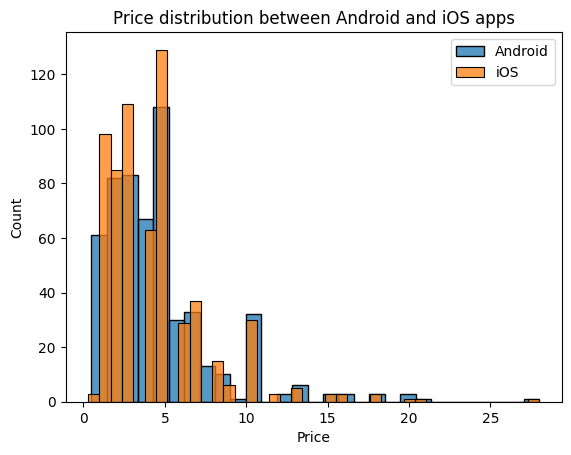

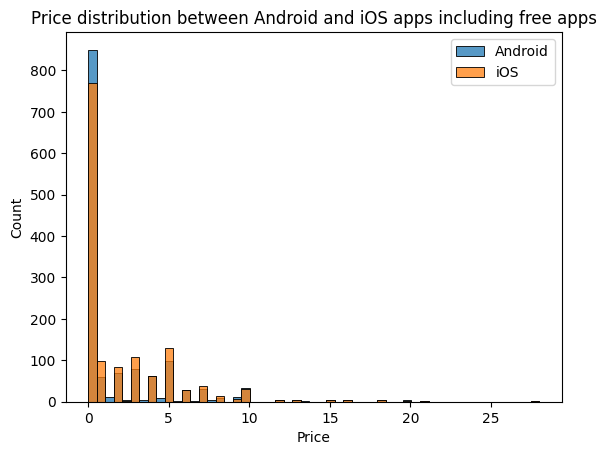

In [ ]:
df = data[['name', 'android_price', 'ios_price']]

# Create a new column to indicate whether the game is free or not
df['is_free'] = df['android_price'].apply(lambda x: x == '0' or x == 'Free') | df['ios_price'].isna()

# Convert the price columns to numeric values
df['android_price'] = pd.to_numeric(df['android_price'], errors='coerce')
df['ios_price'] = pd.to_numeric(df['ios_price'], errors='coerce')

# Calculate the average price for each platform
android_avg_price = df.loc[df['android_price'] > 0, 'android_price'].mean()
ios_avg_price = df.loc[df['ios_price'] > 0, 'ios_price'].mean()

# Print the results
print(f"Android apps average price: {android_avg_price:.2f}")
print(f"iOS apps average price: {ios_avg_price:.2f}")

# Plot the price distributions excluding free apps
fig, ax = plt.subplots()
sns.histplot(df.loc[df['android_price'] > 0, 'android_price'], ax=ax, label='Android').set_title("Price distribution between Android and iOS apps")
sns.histplot(df.loc[df['ios_price'] > 0, 'ios_price'], ax=ax, label='iOS')
plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plot the price distributions including free apps
fig, ax = plt.subplots()
sns.histplot(df.loc[df['android_price'] >= 0, 'android_price'], ax=ax, label='Android').set_title("Price distribution between Android and iOS apps including free apps")
sns.histplot(df.loc[df['ios_price'] >= 0, 'ios_price'], ax=ax, label='iOS')
plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()
plt.show()


Scatter plot to visualize the relationship between the price and user rating of the Android and iOS gaming apps.

In [ ]:
df = data[['android_rating', 'android_price', 'ios_rating', 'ios_price']]

# Convert the price columns to numeric values
df['android_price'] = pd.to_numeric(df['android_price'], errors='coerce')
df['ios_price'] = pd.to_numeric(df['ios_price'], errors='coerce')

# Create a scatter plot
fig = px.scatter(df, x='android_price', y='android_rating', trendline='ols', title='Android Price vs Rating', color='android_price')
fig.show()

fig = px.scatter(df, x='ios_price', y='ios_rating', trendline='ols', title='iOS Price vs Rating', color='ios_price')
fig.show()


<ipython-input-9-660767e1aeed>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-9-660767e1aeed>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Bar charts to find the Game Distribution by Category and Age Rating in Android and iOS platforms.


In [ ]:
android_data = data[['category', 'android_age']]
android_data['platform'] = 'Android'

# Subset the data for iOS games
ios_data = data[['category', 'ios_age']]
ios_data['platform'] = 'iOS'

# Combine the data for both platforms
combined_data = pd.concat([android_data, ios_data])

# Group the data by platform, category, and age rating
grouped_data = combined_data.groupby(['platform', 'category', 'android_age']).size().reset_index(name='count')

# Create a grouped bar chart
fig = px.bar(grouped_data, x='category', y='count', color='android_age', barmode='group', facet_col='platform', title='Game Distribution by Category and Age Rating')
fig.show()

# Subset the data for iOS games
ios_data = data[['category', 'ios_age']]
ios_data['platform'] = 'iOS'

android_data = data[['category', 'android_age']]
android_data['platform'] = 'Android'

# Combine the data for both platforms
combined_data = pd.concat([ios_data, android_data])

# Group the data by platform, category, and age rating
grouped_data = combined_data.groupby(['platform', 'category', 'ios_age']).size().reset_index(name='count')

# Create a grouped bar chart
fig = px.bar(grouped_data, x='category', y='count', color='ios_age', barmode='group', facet_col='platform', title='Game Distribution by Category and Age Rating')
fig.show()

<ipython-input-10-9bff3fb648af>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-9bff3fb648af>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-10-9bff3fb648af>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-9bff3fb648af>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#CONCLUSION

Overall, the analysis of the data suggests that there are some differences and similarities between the Android and iOS app markets. Both platforms have a majority of apps aimed at everyone, with the puzzle genre being the most highly rated on both. However, there are differences in the distribution of apps across categories and age ratings, with Android having more apps targeted at everyone and a higher average price compared to iOS. Additionally, as the age category increases, the number of reviews decreases, indicating that games with more mature content may have a smaller audience. Overall, app developers and marketers can use these insights to better understand the preferences and behaviors of users on each platform and tailor their strategies accordingly.